In [1]:
# Imports
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
from sklearn.metrics import plot_confusion_matrix, classification_report, mean_squared_error
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from kneed import KneeLocator

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.metrics import auc

np.random.seed(42)


%matplotlib inline

ModuleNotFoundError: ignored

In [ ]:
#carregar o arquivo csv 
#por convencao chamamos dataframe de df 
#df = pd.read_csv('................ , sep =';' , encoding = cp1252) ; separador e enconding , usecols =[...]
df = pd.read_csv('drug200.csv', names=['Age','Sex','BP','Cholesterol','Na_to_K','Drug'])
df.dtypes

In [ ]:
df["Age"]=preprocessing.LabelEncoder().fit_transform(df["Age"])
df["Sex"]=preprocessing.LabelEncoder().fit_transform(df["Sex"])
df["BP"]=preprocessing.LabelEncoder().fit_transform(df["BP"])
df["Cholesterol"]=preprocessing.LabelEncoder().fit_transform(df["Cholesterol"])
df["Na_to_K"]=preprocessing.LabelEncoder().fit_transform(df["Na_to_K"])
df["Drug"]=preprocessing.LabelEncoder().fit_transform(df["Drug"])
df.head()

In [3]:
#Vamos separar os dados entre a variável dependente e independente
x = df.drop(['Drug'], axis=1)
y = df['Drug']
x_train, x_test, y_train, y_test = train_test_split(x, y)

NameError: ignored

In [ ]:
len(y.unique())

6

# Método do K-Means a base de dados

In [ ]:
kmeans = KMeans(n_clusters = 6)
kmeans

KMeans(n_clusters=6)

In [ ]:
KMmodel = kmeans.fit(df)
KMmodel

KMeans(n_clusters=6)

In [ ]:
y_pred = KMmodel.labels_

y_pred

array([5, 1, 3, 2, 5, 4, 5, 0, 2, 0, 4, 3, 4, 0, 4, 3, 4, 2, 0, 5, 1, 4,
       1, 1, 0, 1, 4, 1, 5, 4, 4, 5, 5, 2, 1, 0, 5, 5, 0, 5, 5, 4, 0, 0,
       3, 3, 5, 3, 2, 1, 4, 4, 2, 1, 4, 2, 3, 2, 1, 2, 4, 1, 5, 4, 5, 0,
       1, 3, 3, 1, 1, 0, 4, 2, 1, 4, 4, 2, 4, 3, 2, 0, 5, 5, 2, 2, 0, 0,
       0, 1, 4, 0, 0, 1, 1, 0, 3, 1, 1, 1, 4, 3, 3, 3, 5, 1, 5, 3, 4, 5,
       4, 5, 5, 5, 0, 5, 4, 5, 2, 2, 1, 1, 4, 4, 4, 3, 1, 0, 5, 1, 5, 4,
       1, 0, 1, 4, 2, 2, 3, 2, 2, 1, 1, 5, 0, 5, 5, 3, 3, 5, 5, 5, 2, 5,
       0, 4, 2, 3, 1, 2, 3, 2, 5, 3, 1, 4, 4, 1, 0, 1, 3, 3, 2, 4, 4, 3,
       0, 2, 4, 0, 0, 4, 0, 3, 0, 1, 1, 5, 2, 1, 4, 4, 5, 0, 5, 1, 2, 3,
       5, 3, 3], dtype=int32)

In [ ]:
kmeans_centers = KMmodel.cluster_centers_
kmeans_centers

array([[ 39.73333333,   0.6       ,   1.96666667,   1.3       ,
         70.4       ,   2.43333333],
       [ 26.23684211,   0.42105263,   1.73684211,   1.55263158,
        141.5       ,   1.02631579],
       [ 34.5       ,   0.53571429,   1.85714286,   1.46428571,
         14.71428571,   3.85714286],
       [ 17.06896552,   0.4137931 ,   1.89655172,   1.48275862,
         40.93103448,   3.72413793],
       [ 23.63157895,   0.47368421,   1.81578947,   1.52631579,
        103.28947368,   1.        ],
       [ 28.92105263,   0.71052632,   2.13157895,   1.5       ,
        179.5       ,   4.02631579]])

# Traçando a Curva ROC para o dataset

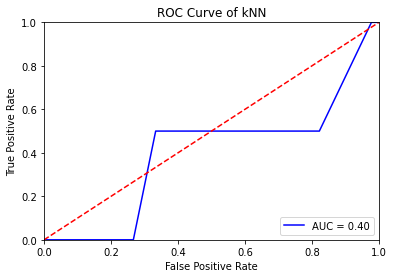

In [ ]:
#divisão do datasete em treino e teste, tamanho do "array" de teste escolhido foi 20% do dataset
#Vamos separar os dados entre a variável dependente e independente
x = df.drop(['Drug'], axis=1)
y = df['Drug']
x_train, x_test, y_train, y_test = train_test_split(x, y)


#Fit
KMmodel.fit(x_train,y_train)

#Predict
y_scores = KMmodel.predict(x_test)
#print(y_scores)

#Avaliação com a metrica ROC

fpr, tpr, threshold = roc_curve(y_test, y_scores, pos_label=2)
roc_auc = auc(fpr, tpr)

#Plot
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Matriz de confusão


In [ ]:
from sklearn.metrics import confusion_matrix

y_true = y
matriz = confusion_matrix(y_true, y_pred)

print(matriz)

[[ 0  0  0  0  0  1]
 [16 37  0  0 38  0]
 [ 1  1  5 10  0  6]
 [ 5  0  5  1  0  5]
 [ 0  0  7  5  0  4]
 [ 8  0 11 13  0 22]]


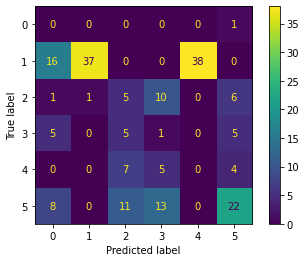

In [ ]:
from sklearn import metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)